In [2]:
# Importing
import theano.tensor as T
import sys, os
sys.path.append("../GeMpy")
sys.path.append("../pygeomod")

import GeMpy_core
import Visualization

import importlib
importlib.reload(GeMpy_core)
importlib.reload(Visualization)
import numpy as np
import pandas as pn
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
np.set_printoptions(precision = 6, linewidth= 130, suppress =  True)

%matplotlib inline
#%matplotlib notebook

In [3]:
carbonates = GeMpy_core.GeMpy()

In [4]:
carbonates.import_data( 3405750.7,3486330.0,5816244.1,5906512.6,-4917.7, -3118.861398, 30,30,30,
                                     path_f = None,
                                     path_i = os.pardir+"/input_data/wells2_1711.csv",  sep = ",")

carbonates.Data.Foliations = pn.DataFrame(np.array([3445063.98, 5863089.02, -3778.800000,90,0,1,1]).reshape(1,7),
                                          columns=['X', 'Y', 'Z', 'dip', 'azimuth', 'polarity', 'formation'])
carbonates.Data.Foliations["formation"] = "Top"
carbonates.Data.Foliations["series"] = "Deafult"
carbonates.Data.calculate_gradient()
carbonates.Data.Interfaces[["Z"]].max()

Z   -3418.861398
dtype: float64

In [5]:
carbonates.update_data()

In [6]:
# Create a class Grid so far just regular grid
carbonates.create_grid()
carbonates.Grid.grid

array([[ 3405750.75    ,  5816244.      ,    -4917.700195],
       [ 3405750.75    ,  5816244.      ,    -4855.670898],
       [ 3405750.75    ,  5816244.      ,    -4793.64209 ],
       ..., 
       [ 3486330.      ,  5906512.5     ,    -3242.919189],
       [ 3486330.      ,  5906512.5     ,    -3180.890381],
       [ 3486330.      ,  5906512.5     ,    -3118.861328]], dtype=float32)

## Plotting raw data

/home/bl3/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/bl3/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


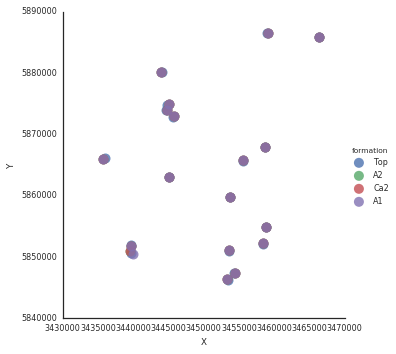

In [7]:
carbonates.Plot.plot_data(direction="z")

In [8]:
# Learn about API authentication here: https://plot.ly/pandas/getting-started
# Find your api_key here: https://plot.ly/settings/api

import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
df = carbonates.Data.Interfaces
df.head()

data = []
clusters = []
#colors = ['rgb(228,26,28)','rgb(55,126,184)','rgb(77,175,74)']

for i in range(len(df['formation'].unique())):
    name = df['formation'].unique()[i]
  
    x = df[ df['formation'] == name ]['X']
    y = df[ df['formation'] == name ]['Y']
    z = df[ df['formation'] == name ]['Z']
    
    trace = dict(
        name = name,
        x = x, y = y, z = z,
        type = "scatter3d",    
        mode = 'markers',
        marker = dict( size=3,  line=dict(width=0) ) )
    data.append( trace )

layout = dict(
    width=800,
    height=550,
    autosize=False,
    title='MAx dataset',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict( x=1, y=1, z=0.2 ),
        aspectmode = 'automatic'        
    ),
)

fig = dict(data=data, layout=layout)

# IPython notebook
py.iplot(fig, filename='Max data', validate=False)

In [9]:
carbonates.set_interpolator(u_grade = 2)

In [15]:
# Reset the block
carbonates.Interpolator.block.set_value(np.zeros_like(carbonates.Grid.grid[:,0]))

# Compute the block
carbonates.Interpolator.compute_block_model([0], verbose = 1)

[1 2 3 4]
[1 1 1 ..., 1 1 1] 0
The serie formations are Top|A2|Ca2|A1


In [16]:
np.unique(carbonates.Interpolator.block.get_value())

array([ 0.], dtype=float32)

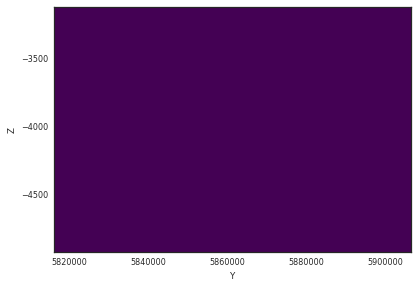

In [17]:
carbonates.Plot.plot_block_section(direction="x", aspect ="auto" )

In [ ]:
carbonates.Plot.plot_potential_field(50, direction="y")

In [20]:
carbonates.Interpolator.a_T.get_value()

array(121015.12922381242)

In [9]:
import plotly.tools as tls
tls.set_credentials_file(username='leguiom', api_key='hcdlNUAEuGC0m2rRy1pq')

In [19]:
Max = pn.read_excel('../input_data/gypsumDec4.xlsx')

In [26]:
Max = Max[['East','North','How']]

In [29]:
Max = Max.dropna()

In [208]:
import scipy
x = np.linspace(Max['East'].min()- 5000, Max['East'].max()+5000, 100) 
y = np.linspace(Max["North"].min()- 5000, Max["North"].max()+5000, 100)
xi, yi = np.meshgrid(x, y)

# Interpolate
rbf = scipy.interpolate.Rbf(Max['East'], Max['North'],  Max['How'], function='linear')
zi = rbf(xi, yi)

In [197]:
%matplotlib inline

In [223]:
plt.scatter?

In [247]:
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10,8
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

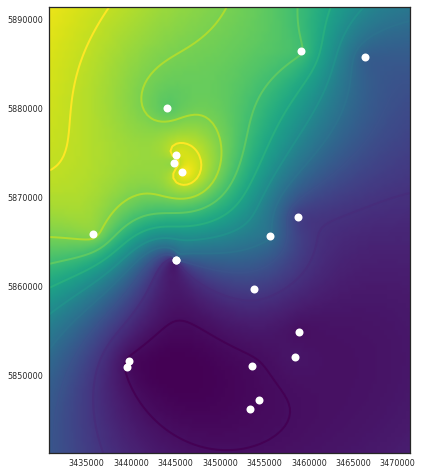

In [251]:

plt.imshow(zi, extent=[x.min(), x.max(), y.min(), y.max()], 
           cmap = 'viridis', origin='bottom')
plt.contour(xi, yi, zi, 10,  cmap = 'viridis'),  #extent=[x.min()- 5000, x.max()+
                                                #        5000, y.min()- 5000, y.max()+5000])
plt.plot(Max['East'], Max["North"],'o', c='white')
#plt.grid()
#plt.savefig('Max.pdf')

/home/bl3/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.



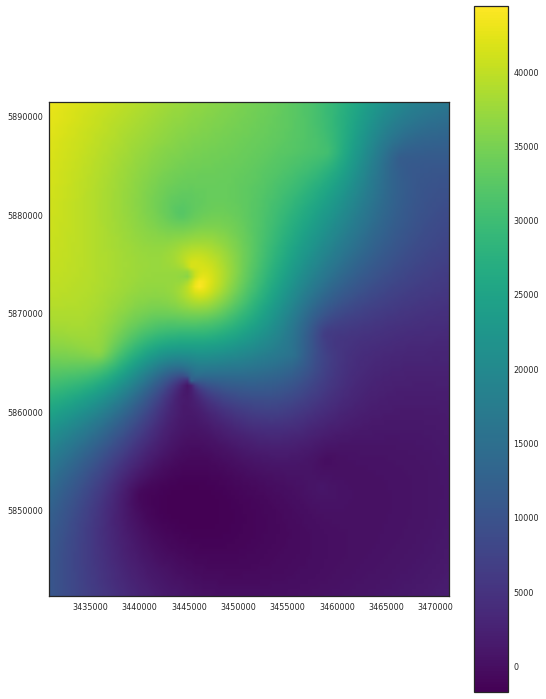

In [215]:
plt.imshow(zi, extent=[x.min(), x.max(), y.min(), y.max()], cmap = 'viridis', origin='bottom')
plt.colorbar()

In [68]:
# calculation of spherical covariance given just the position of the known points x! You can use verbose = 1 to see the 
# intermediate steps
def cov_spherical(x,r, C_o = 1, verbose = 0):  
    
    """x = Array: Position of the measured points"
    r =  Range of the spherical semivariogram
    C_o = Nugget, variance
    """
    
    # Createing the lag vector
  #  i, j = np.indices((len(x),len(x)))
  #  h = np.zeros((len(x),len(x)))
  #  for l in range(len(x)):
  #      h[i==l] = abs(x[l]-x)
    h = x    
    # Initializing
    C_h = np.ones_like(h)
    
    # Appliying the function
    C_h = (h<r)*( C_o*(1-1.5*(h/r)+0.5*(h/r)**3))
    if verbose !=0:
        print ("Our lag matrix is")
        print (h)
        print( "Our covariance matrix is")
        print (C_h)
            
    return C_h


def Krigin2(x, x_pos = np.array([1.,4.,5.]) , por = np.array([0.14, 0.19, 0.15]), mu = False, r = 4.5, C_o = 0.005,verbose = 0):  
    if mu == False:
        mu = np.mean(por)
    
    #Lag:
    Y = (por-mu)
    
    # Covariance matrix:
    C_h = cov_spherical(x_pos, r, C_o, verbose = verbose)
    a = len(C_h)
    C_h = np.hstack((C_h, np.ones((a, 1))))
    C_h = np.vstack((C_h, np.ones(a+1)))
    C_h[-1,-1] = 0
    # "Interpolation point":
    b = np.zeros(len(x_pos))
    dist = abs(x-x_pos)
    b = (dist<r)*C_o*(1-1.5*(dist/r)+0.5*(dist/r)**3)
    b = np.append(b,1)
    
    # Solving the system
    lam = np.linalg.solve(C_h, b)

    sol = sum(por*lam[:-1])
    plt.plot(x_pos,por,'o', c = "r")

  
    # Calculate the variance
  
    var = C_o - np.sum(lam[:-1]*b[:-1]) + lam[-1]
    if verbose != 0:
        print ("weight", lam)  
        print (lam*b)
        print ("mean solution", sol)
        print ("variance solution", var)
        
    plt.xlim(0,6)
    plt.ylim(0.1,0.3)
    plt.axvline(pos, c = 'r', ls = ':')
    plt.title("Value at the position of the red line?")
    plt.xlabel("x")
    plt.ylabel("Porosity")
   
    return sol, var

def euclidian_distances(points):
    return (np.sqrt((points ** 2).sum(1).reshape((points.shape[0], 1)) +
            (points ** 2).sum(1).reshape((1, points.shape[0])) -
            2 * points.dot(points.T)))

def euclidian_distances2(wells, grid):
     return (np.sqrt(
            (wells ** 2).sum(1).reshape((wells.shape[0], 1)) +
            (grid ** 2).sum(1).reshape((1, grid.shape[0])) -
            2 * wells.dot(grid.T)))


In [130]:
grid_x = np.linspace(x.min(), x.max(),100)
grid_y = np.linspace(y.min(), y.max(),100)

grid = np.vstack((grid_x,grid_y))
grid.T;

ED = euclidian_distances(Max[['East', 'North']])
ED = np.nan_to_num(ED.values)
A = cov_spherical(ED, r = 50000)
A = np.vstack((A, np.ones_like(A[0])))
A = np.hstack((A, np.ones(len(A)).reshape(len(A),1)))

b = cov_spherical(euclidian_distances2(Max[['East', 'North']], grid.T).values, r = 50000)
b = np.vstack((b, np.ones_like(b[0])))

In [132]:
lam = np.linalg.solve(A,b)

In [155]:
sol = (lam[:-1,:].T * Max['How'].values).sum(axis = 1)

In [161]:
plt.contour((grid[0,:], grid[1,:]), sol)

ValueError: Contour levels must be increasing

In [152]:
grid[0,:].shape

(100,)

In [162]:
plt.contourf?